In [23]:
#Library imports
import re
import os
import sys
import shutil
import time
import math
import fnmatch
import random
import warnings
import numpy as np
import pandas as pd
import scipy.stats as scs
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt

from collections import OrderedDict

import scipy.stats as scs

import fiona
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
from pyproj import Proj
import geoplot as gplt
import geoplot.crs as gcrs

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Allows access to scripts and modules relative to the parent directory.
parent = os.getcwd()
sys.path.append(os.path.join(parent, "functions"))

# Project specific user driven functions
from cleaning_functions import *
from eda_functions import *

# My open source reusable user driven function repository.
from random_lumberjacks.src.random_lumberjacks.cleaning.cleaning_functions import *
from random_lumberjacks.src.random_lumberjacks.model.model_classes import *
from random_lumberjacks.src.random_lumberjacks.visualization.visualization_functions import *

#Notebook arguments
%matplotlib inline

SEED=121

In [47]:
df = pd.read_pickle("data/test.pickle").reset_index().drop(columns="index")
df = df.drop(columns=["Station", "Database", "GroupCode", "TierLevel", "Point", "HUCNAME_", "HUC12_", "FIPS_", "Date"])

In [55]:
target = "SPECIFIC CONDUCTIVITY"
df_check = df.copy()
df_check[target] = np.log(df_check[target])
features = df.columns.difference([target])
scaler = StandardScaler()
scaled = scaler.fit_transform(df_check[features])
scaled = pd.DataFrame(scaled, columns=features)
df_check = pd.concat([scaled, df_check[target]], axis=1)

In [58]:
linearity = LinearityTest(df_check)

In [39]:
df.columns

Index(['Latitude', 'Longitude', 'Pressure', 'Rainfall', 'Rainfaill_24H',
       'Rainfaill_48H', 'WATER TEMPERATURE DEG', 'SPECIFIC CONDUCTIVITY',
       'AIR TEMPERATURE DEG', 'Wind_Measure_Dist', 'Snowfall', 'Wind_Vel_x',
       'Wind_Vel_y'],
      dtype='object')

WATER_TEMPERATURE_DEG predicting SPECIFIC_CONDUCTIVITY:
R2: 0.001582833047315324, MSE: 31.513227870706032, RMSE: 5.6136643888556454:
Coeficient: -0.05245728088392951, Intercept: 5.002871143505205

P-values:
Intercept                0.000000
WATER_TEMPERATURE_DEG    0.000021
dtype: float64

Jarque-Bera:
('Jarque-Bera', 59303.041895368086) ('Prob', 0.0) ('Skew', -2.10027153053962) ('Kurtosis', 13.326521615258516)

Goldfeld-Quandt:
('F statistic', 0.7965664122766329) ('p-value', 0.9999999999999997)


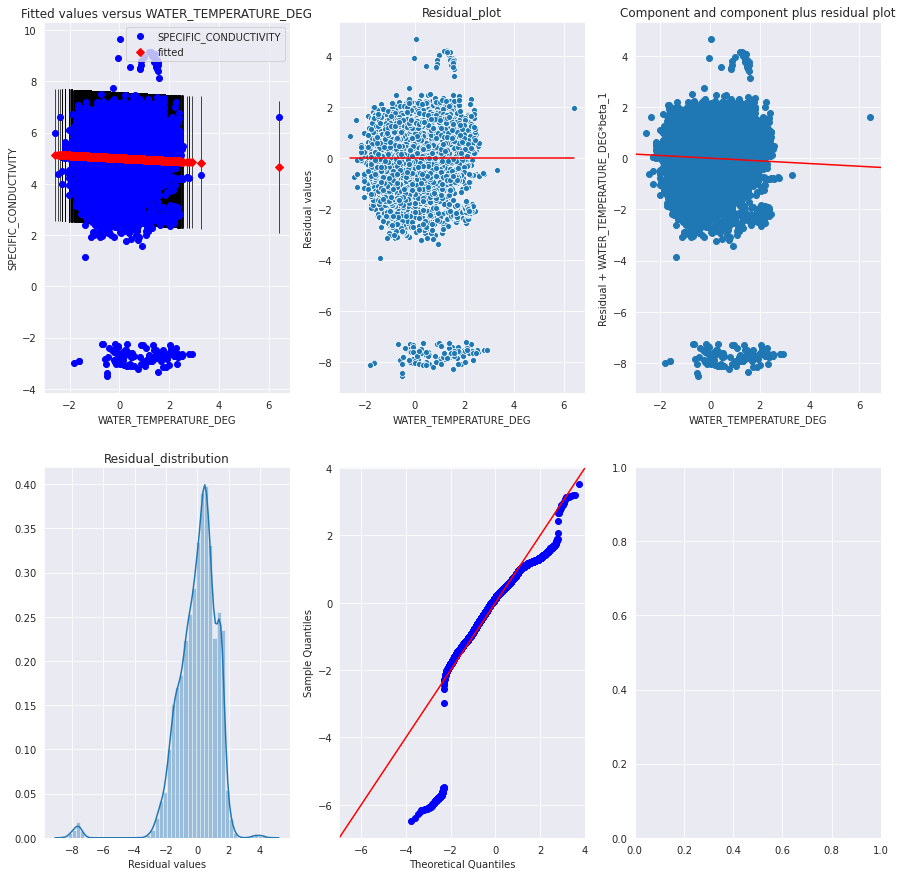

In [60]:
linearity.sb_linearity_test("WATER TEMPERATURE DEG", target)

In [ ]:
X = df[features]
y = df[target]
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=.2, random_state=SEED)